# Objectives

- This is my first on-my-own look at the mnist dataset. Going to do some exploration of it and try to model it.
- Going to try to apply the previous model archetecture used for mnist digit handwriting recognition to this.
- This session is likely to be messier
- For this round... I'm hoping to get over 80% but I don't recall how easy or hard that is. Maybe I'll say 70% for this round.

In [1]:
import tensorflow as tf

In [4]:
( X_train_raw, y_train_raw ), ( X_test_raw, y_test_raw ) = tf.keras.datasets.fashion_mnist.load_data()

# X_train_raw, y_train_raw, X_test_raw, y_test_raw

In [7]:
X_train_raw.shape, X_test_raw.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
tf.reduce_max(X_train_raw)

<tf.Tensor: shape=(), dtype=uint8, numpy=255>

In [8]:
X_train_normalized = X_train_raw / 255.0

X_test_normalized = X_test_raw / 255.0

In [30]:
y_train_one_hot_encoded = tf.keras.utils.to_categorical(y_train_raw)

y_test_one_hot_encoded = tf.keras.utils.to_categorical(y_test_raw)

In [31]:
X_train = tf.expand_dims(X_train_normalized, axis=-1)
y_train = y_train_one_hot_encoded

X_test = tf.expand_dims(X_test_normalized, axis=-1)
y_test = y_test_one_hot_encoded

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (60000, 28, 28, 50)       500       
                                                                 
 max_pooling2d_90 (MaxPoolin  (60000, 14, 14, 50)      0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (60000, 14, 14, 50)       22550     
                                                                 
 max_pooling2d_91 (MaxPoolin  (60000, 7, 7, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_92 (Conv2D)          (60000, 7, 7, 50)         22550     
                                                                 
 max_pooling2d_92 (MaxPoolin  (60000, 3, 3, 50)      

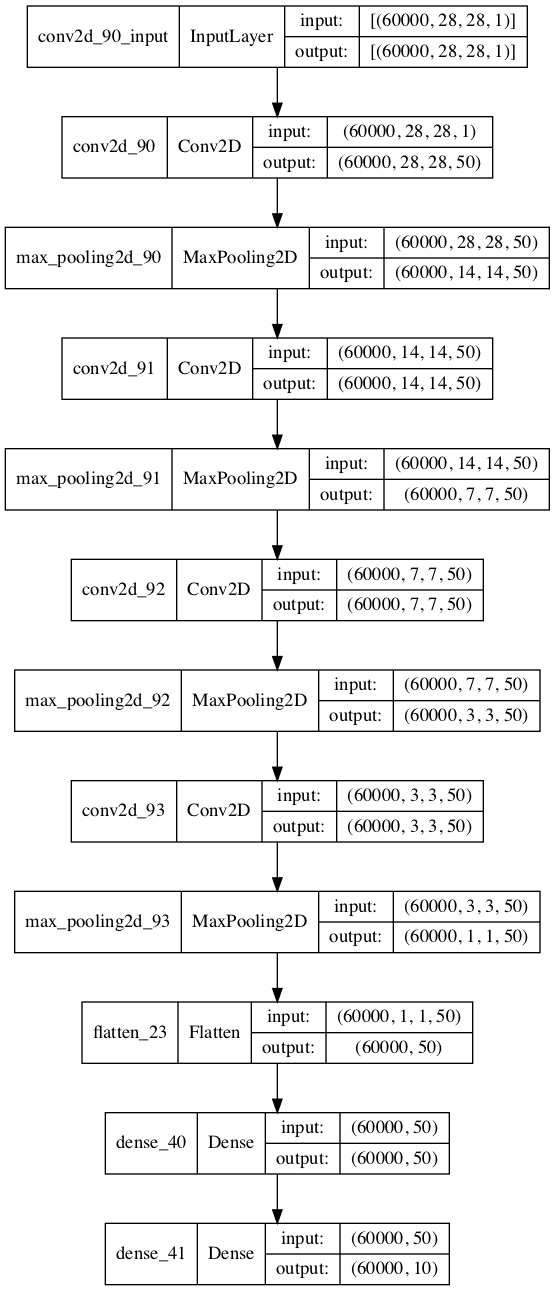

In [45]:
tf.random.set_seed(777)

model_001 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50, (3, 3), padding="same", activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Conv2D(50, (3, 3), padding="same", activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Conv2D(50, (3, 3), padding="same", activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Conv2D(50, (3, 3), padding="same", activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
    
    tf.keras.layers.Dense(len(y_train_one_hot_encoded[0]), activation=tf.keras.activations.softmax)    
])

model_001.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[ "accuracy" ]
)

model_001.build(X_train.shape)

model_001.summary()

tf.keras.utils.plot_model(model_001, show_shapes=True)

In [46]:
model_001_history = model_001.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)
    ]
)

Epoch 1/100
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4984 - accuracy: 0.8170 - val_loss: 0.3790 - val_accuracy: 0.8627
Epoch 2/100
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3147 - accuracy: 0.8861 - val_loss: 0.3070 - val_accuracy: 0.8913
Epoch 3/100
1875/1875 [==============================] - 91s 49ms/step - loss: 0.2681 - accuracy: 0.9018 - val_loss: 0.3074 - val_accuracy: 0.8863
Epoch 4/100
1875/1875 [==============================] - 119s 64ms/step - loss: 0.2388 - accuracy: 0.9124 - val_loss: 0.2936 - val_accuracy: 0.8941
Epoch 5/100
1875/1875 [==============================] - 125s 67ms/step - loss: 0.2158 - accuracy: 0.9201 - val_loss: 0.2554 - val_accuracy: 0.9094
Epoch 6/100
1875/1875 [==============================] - 89s 48ms/step - loss: 0.1991 - accuracy: 0.9271 - val_loss: 0.2586 - val_accuracy: 0.9080
Epoch 7/100
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1821 - accuracy: 0.9327 - val_loss:

In [47]:
model_001.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2405 - accuracy: 0.9156


[0.2404651641845703, 0.9156000018119812]

# Summary

- Interesting... using the same model architecture as mnist digit recognition I get good performance (~91%) on the more complicated mnist fashion dataset  